In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

In [3]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
print('This is the number of trainable weights before freezing the conv base:',
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [5]:
conv_base.trainable = False

In [6]:
print('This is the number of trainable weights after freezing the conv base:',
      len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

In [10]:
base_dir = "data/cats_and_dogs_small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 200ms/step - loss: 0.5977 - acc: 0.6725 - val_loss: 0.5309 - val_acc: 0.7440
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4796 - acc: 0.7865 - val_loss: 0.4541 - val_acc: 0.7940
Epoch 3/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4314 - acc: 0.8125 - val_loss: 0.4225 - val_acc: 0.8170
Epoch 4/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3996 - acc: 0.8240 - val_loss: 0.3890 - val_acc: 0.8350
Epoch 5/30
100/100 [==============================] - 18s 176ms/step - loss: 0.3821 - acc: 0.8305 - val_loss: 0.3881 - val_acc: 0.8250
Epoch 6/30
100/100 [==============================] - 18s 179ms/step - loss: 0.3764 - acc: 0.8220 - val_loss: 0.3731 - val_acc: 0.8350
Epoch 7/30
100/100 [==============================] - 18s 180ms/step - loss: 0.3624 - acc: 0.8450 - val_loss: 0.3759 - val_acc: 0.8370
Epoch 8/30
100/100 [==============================] - 1

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

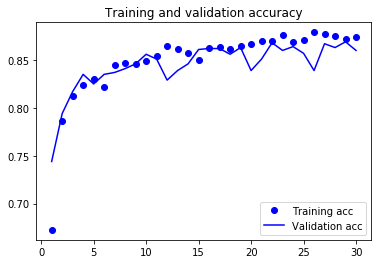

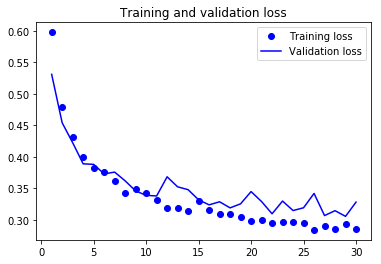

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()